# Homework 2 Part 2

**This is an individual assignment.**

---
---
---

Write your own code. You may repurpose any functions built during lecture. You may use ```scikit-learn``` functions.

---
---
---

# Exercise 1 (15 points)

**In this problem, you will be working with a crab dataset. The dataset contains 200 samples. Each sample is a 7-dimensional vector representing crab attributes (front lip width, rear width, length, width, depth, male and female), namely 5 morphological measurements on 50 crabs each of two color forms and both sexes, of the species *Leptograpsus* variegatus collected at Fremantle, W. Australia.**

* **Dataset Source: Campbell, N.A. and Mahon, R.J. (1974) A multivariate study of variation in two species of rock crab of genus *Leptograpsus*. *Australian Journal of Zoology* 22, 417–425.**

**Let's load the data:**

In [9]:
import pandas as pd
import numpy as np
from numpy.linalg import inv, det
from math import pi, exp, log
data = pd.read_csv("crab.txt", delimiter="\t")
data

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1
...,...,...,...,...,...,...,...,...
195,1,12.3,11.0,26.8,31.5,11.4,1,0
196,1,12.0,11.1,25.4,29.2,11.0,0,1
197,1,8.8,7.7,18.1,20.8,7.4,1,0
198,1,16.2,15.2,34.5,40.1,13.9,0,1


**The first column corresponds to the class label (crab species) and the other 7 columns correspond to the features. Use the first 140 samples as your training set and the last 60 samples as your test set.**

In [11]:
# Partitioning the data into training and test sets

X_train = data.iloc[:140,1:].to_numpy()
t_train = data.iloc[:140,0].to_numpy()

X_test = data.iloc[140:,1:].to_numpy()
t_test = data.iloc[140:,0].to_numpy()

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((140, 7), (60, 7), (140,), (60,))

**Answer the following questions:**

1. (5 points) **Implement the Naive Bayes classifier, under the assumption that your data likelihood model $p(x|C_j)$ is a multivariate Gaussian and the prior probabilities $p(C_j)$ are dictated by the number of samples $n_j\in\mathbb{R}$ that you have for each class. Build your own code to implement the classifier.**

2. (5 points) **Did you encounter any problems when implementing the probabilistic generative model? What is your solution for the problem? Explain why your solution works. (Note: There is more than one solution.)**

3. (5 points) **Report your classification results in terms of a confusion matrix in both training and test set. (You can use the function ```confusion_matrix``` from the module ```sklearn.metrics```.)**

In [19]:
#  Naive Bayes classifier
class NaiveBayesGaussian:
    def __init__(self):
        self.means = {}
        self.covariances = {}
        self.priors = {}
        self.epsilon = 1e-6  
    
    def fit(self, X_train, y_train):
        classes = np.unique(y_train)
        for cls in classes:
            X_cls = X_train[y_train == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False) + self.epsilon * np.identity(X_cls.shape[1])
            self.priors[cls] = X_cls.shape[0] / X_train.shape[0]

    def multivariate_gaussian(self, x, mean, cov):
        size = len(x)
        cov_det = det(cov)
        cov_inv = inv(cov)
        norm_const = 1.0 / ((2 * pi) ** (size / 2) * cov_det ** 0.5)
        x_diff = x - mean
        return norm_const * exp(-0.5 * np.dot(x_diff.T, np.dot(cov_inv, x_diff)))

    def predict(self, X_test): 
        y_pred = []
        for x in X_test:
            posteriors = []
            for cls in self.means:
                likelihood = self.multivariate_gaussian(x, self.means[cls], self.covariances[cls])
                prior = self.priors[cls]
                posteriors.append(log(likelihood) + log(prior))
            y_pred.append(np.argmax(posteriors))
        return np.array(y_pred)


nb_classifier = NaiveBayesGaussian()

# train model
nb_classifier.fit(X_train, t_train)

# predict
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

# compute
confusion_train = confusion_matrix(t_train, y_train_pred)
confusion_test = confusion_matrix(t_test, y_test_pred)

#confusion_matrix 
print("a confusion matrix in training set：\n", confusion_train)
print("a confusion matrix in test set：\n", confusion_test)

a confusion matrix in training set：
 [[72  0]
 [ 0 68]]
a confusion matrix in test set：
 [[28  0]
 [ 0 32]]


---

# Exercise 2 (15 points)

(Developed by Spencer Chang.)

In [21]:
# Loads necessary packages
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

Text(0, 0.5, 'Petal Length (cm)')

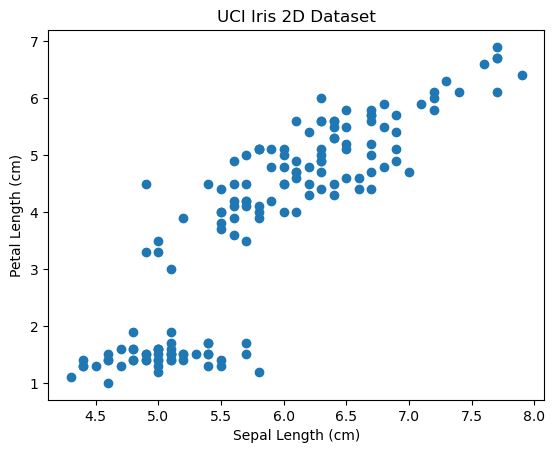

In [23]:
X, _ = load_iris(return_X_y=True)
X = np.concatenate((X[:, 0][:, np.newaxis], X[:, 2][:, np.newaxis]), axis=-1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("UCI Iris 2D Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

**Implement the Expectation-Maximization (EM) algorithm to fit a Gaussian Mixture Model (with an appropriate number of components) given the dataset above. Recall the form of the Gaussian probability density function is defined as:**

\begin{align*}
    P\left(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k\right) = \frac{1}{(2\pi)^{\frac{d}{2}}|\mathbf{\Sigma}_k|^{\frac{1}{2}}} \exp \left\{ -\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x}-\mathbf{\mu}_k)\right\}
\end{align*}

**Answer the following questions:**

1. (3 point) **Implement the method for computing the membership matrix whose elements are $C_{ik}$** given the data $\mathbf{X}$ and estimated parameters $\mathbf{\mu}_k^{t}$ and $\mathbf{\Sigma}_k^{t}$.

In [27]:
def gaussian_pdf(X, mu, cov):
    """
        X - Data Matrix
        mu - an iterable containing each of the components' mean vectors (iteration t)
        cov - an iterable containing each of the components' covariance matrices
    """
    d = X.shape[1]  # Dimensionality of the data
    cov_inv = np.linalg.inv(cov)
    diff = X - mu
    exp_term = np.exp(-0.5 * np.sum(np.dot(diff, cov_inv) * diff, axis=1))
    denom = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    return exp_term / denom
    
def member_mat(X, mu_list, cov_list, p_k):  
    n_samples = X.shape[0]
    n_components = len(mu_list)
    C_ik = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        C_ik[:, k] = p_k[k] * gaussian_pdf(X, mu_list[k], cov_list[k])
    
    C_ik /= C_ik.sum(axis=1, keepdims=True)  
    return C_ik

2. (3 point) **Implement the method for updating the means (eg. finding $\mathbf{\mu}_k^{t+1}$)** given data $\mathbf{X}$ and the membership matrix whose elements are $C_{ik}$.

In [33]:
def mean_update(X, C):
    """
    Argument Descriptions:
        X - Data Matrix
        C - Memberships/responsibilities matrix
    """
    n_components = C.shape[1]  
    n_features = X.shape[1]  #
    
    # initiate 
    means = np.zeros((n_components, n_features))
    
    for k in range(n_components):
        weighted_sum = np.sum(C[:, k][:, np.newaxis] * X, axis=0)
        total_weight = np.sum(C[:, k])
       # updating the means 
        means[k] = weighted_sum / total_weight
    
    return means

3. (3 point) **Implement the method for updating the covariance matrix (eg. finding $\mathbf{\Sigma}_k^{t+1})$** given data $\mathbf{X}$, the new means $\mathbf{\mu}_k^{t+1}$, and the membership matrix whose elements are $C_{ik}$.

In [35]:
def sd_update(X, new_mu, C):
    """
    Argument Descriptions:
        X - Data Matrix
        new_mu - an iterable containing each of the components' mean vectors (iteration t+1)
        C - Memberships/responsibilities matrix
    """
    n_components = C.shape[1]  
    n_samples, n_features = X.shape  
    
    # initiate
    covariance = np.zeros((n_components, n_features, n_features))
    
    #compute
    for k in range(n_components):
        diff = X - new_mu[k]
        weighted_sum = np.zeros((n_features, n_features))
        for i in range(n_samples):
            weighted_sum += C[i, k] * np.outer(diff[i], diff[i])
        
        total_weight = np.sum(C[:, k])
        # update
        covariance[k] = weighted_sum / total_weight
    
    return covariance

4. (3 points) **Put your EM-GMM algorithm together in the method `GaussianMixtureModel` below.** How you decide to initialize Gaussian means, covariance matrices, and component probabilities is up to you.

In [113]:
def log_likelihood(X, mu_list, cov_list, p_k):
  
    n_samples = X.shape[0]
    n_components = len(mu_list) 
    likelihood = np.zeros(n_samples)
    
    for k in range(n_components):
        likelihood += p_k[k] * gaussian_pdf(X, mu_list[k], cov_list[k])
    
    return np.sum(np.log(likelihood))


def GaussianMixtureModel(X, n_components=2, max_iter=100, tol=1e-6):
    """  
    parameters：
        X - Data Matrix
     """
    
    n_samples, n_features = X.shape
    
    # initiate
    np.random.seed(42)  
    mu_list = X[np.random.choice(n_samples, n_components, replace=False)]  
    cov_list = [np.cov(X.T) for _ in range(n_components)]  
    p_k = np.ones(n_components) / n_components  
    
   
    log_likelihood_value = log_likelihood(X, mu_list, cov_list, p_k)
    
    for iteration in range(max_iter):
        C_ik = member_mat(X, mu_list, cov_list, p_k)
        mu_list = mean_update(X, C_ik)
        cov_list = sd_update(X, mu_list, C_ik)
        p_k = np.mean(C_ik, axis=0) 
        
         
        new_log_likelihood_value = log_likelihood(X, mu_list, cov_list, p_k)
        
        
        if np.abs(new_log_likelihood_value - log_likelihood_value) < tol:
            print(f"EM converges at the {iteration+1} th iteration")
            break
        
         # update
        log_likelihood_value = new_log_likelihood_value
    
    return mu_list, cov_list, p_k, C_ik

5. (1 point) Using your EM-GMM algorithm in part 4, **fit a Gaussian Mixture Model with $K$ components on the dataset**.

In [115]:
K = 3
mu_list, cov_list, p_k, C_ik = GaussianMixtureModel(X, n_components=K)

print("Means:", mu_list)
print("Covariance matrices:", cov_list)
print("Component probabilities:", p_k)

EM converges at the 86 th iteration
Means: [[6.04664404 4.73066809]
 [5.00602524 1.46193909]
 [7.13909059 5.61940038]]
Covariance matrices: [[[0.25617281 0.28179524]
  [0.28179524 0.51140141]]

 [[0.12177528 0.01604043]
  [0.01604043 0.02953344]]

 [[0.20583966 0.35135107]
  [0.35135107 0.70939115]]]
Component probabilities: [0.53534734 0.3332851  0.13136756]


6. (2 point) **Demonstrate the clustering of your EM algorithm by plotting each point in the dataset with a unique color depending on what Gaussian component each point belongs to.** Please use only one color to represent each Gaussian's membership.

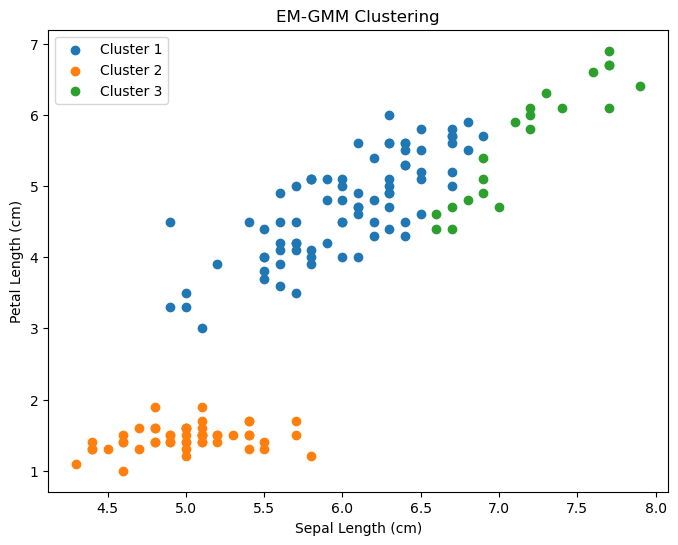

In [90]:
def plot_clusters(X, C_ik):
    # Get the cluster each point most likely belongs to (argmax on the membership matrix)
    cluster_assignments = np.argmax(C_ik, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title("EM-GMM Clustering")
    
    # Scatter plot for each Gaussian component
    for k in range(np.max(cluster_assignments) + 1):
        cluster_points = X[cluster_assignments == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Petal Length (cm)")
    plt.legend()
    plt.show()

# Call the plot function
plot_clusters(X, C_ik)

---

# Exercise 3 (15 Points)

(Developed by Spencer Chang, 2024.)

In [40]:
import numpy as np
from PIL import Image as Image
from sklearn import mixture as skmix
from sklearn import metrics as skmetrics
from matplotlib import pyplot as plt

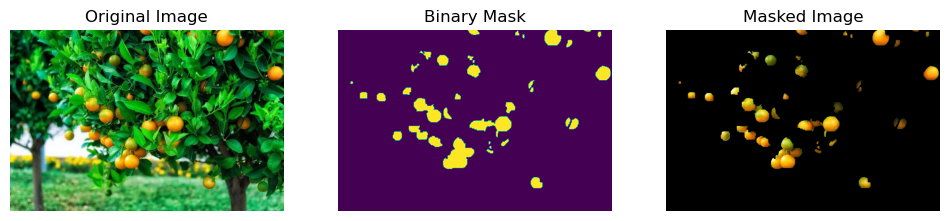

In [127]:
X_img = np.array(Image.open("./oranges/orange_956.jpg"))
Y_img = np.array(Image.open("./oranges/orange_956_mask.png"))

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].set_title("Original Image")
axes[1].set_title("Binary Mask")
axes[2].set_title("Masked Image")
axes[0].imshow(X_img)
axes[1].imshow(Y_img)
axes[2].imshow(X_img * Y_img[..., np.newaxis])

#### Semantic Segmentation
- *The task of labeling each pixel in an image from a given set of classes*. Another way of looking at this is that we color each pixel with one of $C$ colors that corresponds to classes $t_c,\ c\in \{1,\dots,C\}$.

- Depicted above is a special case of semantic segmentation: *binary segmentation*. In this task, there is the object of interest (oranges) and the background. We may consider these classes respectively labeled by the integers 1 and 0. Oranges are "positive" (1), and anything else is "negative" (0).

#### Intersection-over-Union
- To evaluate segmentation performance, we must introduce another metric to compare a learning model's prediction with ground truth labels.

- A way of comparing different segmentation results (ie. prediction vs. truth) is a mathematical set theory metric called *Intersection-over-Union (IoU)*. The IoU (aka. Jaccard index) of two binary segmentation masks is defined as

\begin{align*}
    \text{IoU}(\mathbf{Y}, \mathbf{\hat{Y}}) &= \frac{|\mathbf{Y} \cap \mathbf{\hat{Y}}|}{|\mathbf{Y} \cup \mathbf{\hat{Y}}|}\\
       &= \frac{\sum_{r=1}^{H} \sum_{c=1}^{W} \mathbf{Y}_{rc} \mathbf{\hat{Y}}_{rc}}{\sum_{r=1}^{H} \sum_{c=1}^{W} \mathbf{Y}_{rc} + \mathbf{\hat{Y}}_{rc} - \mathbf{Y}_{rc} \mathbf{\hat{Y}}_{rc}}
\end{align*}

- $\mathbf{Y}$ is the ground truth or reference mask, while the $\mathbf{\hat{Y}}$ is the predicted segmentation mask. Both sums are across all $R$ rows and all $W$ columns. Put another way, $\mathbf{Y}$ and $\mathbf{\hat{Y}}$ are $R\times W$ masks.

- The first equation states that IoU is better when the area of positive label overlap (true positives) is nearly equivalent to the same size as the total area of both masks' combined positive regions. The subtraction by overlap in the bottom of the second equation indicates that the equation is removing any repeat counts when adding up the total number of positive labels across both masks. **IoU is bounded on $[0, 1]$.**

- See documentation on scikit-learn to understand how the [`jaccard_score`](https://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-score) is computed for binary and multiclass problems.

#### Exercise 3 - Tasks

**Utilize the EM-GMM algorithm to segment oranges from the above image without using the provided mask.**

**Please complete the following tasks:**
1. (6 points) *Fit the GMM using at least 3 different sets of initialization settings* (ie. more components, different starting parameters, different stopping conditions).

    - You may use the `sklearn.mixture.GaussianMixture` object to complete this part. Please refer to the scikit-learn documentation here: [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

1. (3 points) *Plot a figure* that shows one of your segmentation results.

    - To create a binary mask, you will have to choose a threshold on your likelihood that a given pixel is an orange or background. It is recommended that the threshold is chosen based on the best IoU score.

1. (6 points) *Compare and discuss* the binary segmentation performance of the different initialization settings that you chose.

    - To compare the performance of different GMM fits, please use the **intersection-over-union (IoU)** metric described above along with the provided ground truth mask.

If interested, the images come from a dataset posted on [roboflow](universe.roboflow.com): [oranges-detection Computer Vision Project](https://universe.roboflow.com/locatec/oranges-detection).

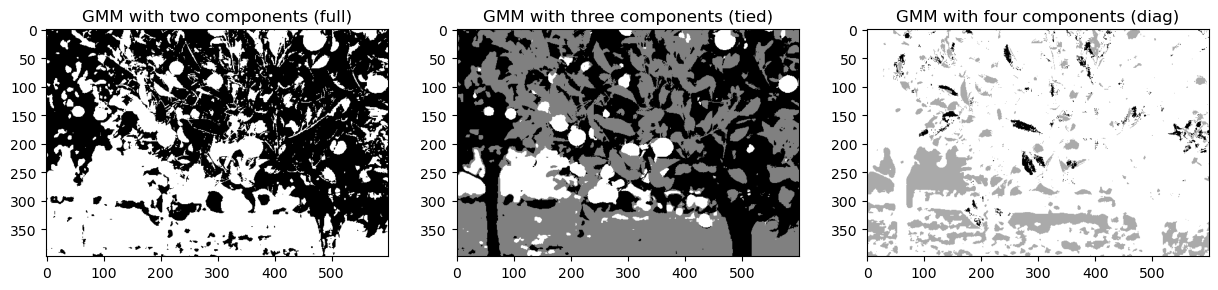

In [149]:
from sklearn.mixture import GaussianMixture

X_reshaped = X_img.reshape(-1, 3)

# initiate
gmm1 = GaussianMixture(n_components=2, covariance_type='full', random_state=0, max_iter=100).fit(X_reshaped)
gmm2 = GaussianMixture(n_components=3, covariance_type='tied', random_state=42, max_iter=200).fit(X_reshaped)
gmm3 = GaussianMixture(n_components=4, covariance_type='diag', random_state=99, max_iter=150).fit(X_reshaped)

# predict
segmentation1 = gmm1.predict(X_reshaped)
segmentation2 = gmm2.predict(X_reshaped)
segmentation3 = gmm3.predict(X_reshaped)

# reshape
segmentation1_img = segmentation1.reshape(X_img.shape[:2])
segmentation2_img = segmentation2.reshape(X_img.shape[:2])
segmentation3_img = segmentation3.reshape(X_img.shape[:2])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(segmentation1_img, cmap='gray')
axes[0].set_title('GMM with two components (full)')
axes[1].imshow(segmentation2_img, cmap='gray')
axes[1].set_title('GMM with three components (tied)')
axes[2].imshow(segmentation3_img, cmap='gray')
axes[2].set_title('GMM with four components (diag)')

plt.show()

**Please respond to Question 3 in the markdown box below.**

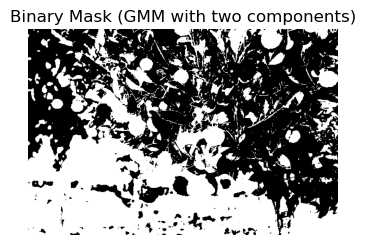

In [161]:
binary_mask = (segmentation1_img == 1).astype(int)

plt.figure(figsize=(4, 4))
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask (GMM with two components)')
plt.axis('off')
plt.show()

In [176]:
from sklearn.metrics import jaccard_score

Y_reshaped = Y_img.reshape(-1)

iou1 = jaccard_score(Y_img, segmentation1.ravel(), average='macro')
iou2 = jaccard_score(Y_img, segmentation2.ravel(), average='macro')
iou3 = jaccard_score(Y_img, segmentation3.ravel(), average='macro')

print(f'GMM with two components (full) IoU: {iou1:.4f}')
print(f'GMM with three components (tied) IoU: {iou2:.4f}')
print(f'GMM with four components (diag) IoU: {iou3:.4f}')

GMM with two components (full) IoU: 0.3457
GMM with three components (tied) IoU: 0.1433
GMM with four components (diag) IoU: 0.0058


---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___